In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Read the data files**

In [ ]:
train = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')

In [ ]:
train.head(2)

In [ ]:
test = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')

In [ ]:
test.head(2)

In [ ]:
movies = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')

In [ ]:
movies.head(2)

---
---

**Datatypes for train , test and movies** 

In [ ]:
train.info()

In [ ]:
test.info()

In [ ]:
movies.info()

---
---

<h1 align="left"><font color='yellow'>Dummy Classifier</font></h1>

**defining feature(X) & target variable(y)  for dummy classifier**

In [ ]:
X = train.drop(columns = ['sentiment'])
X.head(3)

In [ ]:
y= train['sentiment']
y.head(3)

**Label encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #labelEncoder Object

**label encode y(sentiment column)**

In [ ]:
# fit the le object for sentiment and transform it into label encoder array 
y = le.fit_transform(y)
y

**code for Dummy Classifier**

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy ="most_frequent")
dummy_clf.fit(X,y)
prediction = dummy_clf.predict(test)

In [ ]:
prediction

In [ ]:
submission = pd.DataFrame(columns = ['sentiment'])
# submission ['id'] = [ i for i in range (len(prediction))]
submission ['sentiment'] = prediction
submission.to_csv('submission.csv' , index_label = 'id' )

In [ ]:
submission.head()

**This Dummy Classifier gave a score of 0.66846 it is the cut-off score**

---
---

<h1 align="left"><font color='yellow'>'reviewText' as feature and 'sentiment' as target Variable</font></h1>

****Making a copy of test, train and movies data for furthur processing****

In [ ]:
copy_of_test = test.copy()
copy_of_test.head(2)

In [ ]:
copy_of_train = train.copy()
copy_of_train.head(2)

In [ ]:
copy_of_movies = movies.copy()
copy_of_movies.head(2)

In [ ]:
copy_of_movies.info()

**Remove dublicates rows from movies dataset**

In [ ]:
copy_of_movies_wo_dub = copy_of_movies.drop_duplicates('movieid')
copy_of_movies_wo_dub.head(2)

**fill the missing value of reviewText from train and test data set**

In [ ]:
copy_of_train = copy_of_train.fillna({'reviewText' : 'missingvalue'})

In [ ]:
copy_of_test = copy_of_test.fillna({'reviewText' : 'missingvalue'})

---
---

 <h1 align="left"><font color='yellow'>Merging movies and train data</font></h1>

In [ ]:
train_merge_movies = pd.merge(copy_of_train,copy_of_movies_wo_dub)

In [ ]:
train_merge_movies.head(2)

<h1 align="left"><font color='yellow'>Graphical representation</font></h1>

<font color='skyblue'>simple Imputer and min max scaler on 'runtimeMinutes' and 'audienceScore'</font>

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


#SimpleImputer with the strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the columns with missing values
copy_of_movies[['audienceScore', 'runtimeMinutes']] = imputer.fit_transform(copy_of_movies[['audienceScore', 'runtimeMinutes']])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'audienceScore' and 'runtimeMinutes' columns
copy_of_movies[['audienceScore', 'runtimeMinutes']] = scaler.fit_transform(copy_of_movies[['audienceScore', 'runtimeMinutes']])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# a box plot for 'audienceScore'
sns.boxplot(x=train_merge_movies['audienceScore'])

# a title and label for the y-axis
plt.title('Box Plot of Audience Score')
plt.ylabel('Audience Score')

# the plot
plt.show()

# a box plot for 'runtimeMinutes'
sns.boxplot(x=train_merge_movies['runtimeMinutes'])

# a title and label for the y-axis
plt.title('Box Plot of Runtime Minutes')
plt.ylabel('Runtime Minutes')

# the plot
plt.show()

In [ ]:
#histogram plot with KDE(Kernel Density Estimation)
sns.displot(data = train_merge_movies , x = 'audienceScore' , hue= 'sentiment', kde=True, element="step", common_norm=False)
# labels
plt.xlabel('audienceScore')
plt.grid()
#graph title
plt.title('Distribution of audience score by Sentiment')

***It shows that higher the Audience Score  more is the positive sentiment***

In [ ]:
# histogram plot with KDE(Kernel Density Estimation)
sns.histplot(data= train_merge_movies , x='runtimeMinutes', hue='sentiment', kde=True, element="step", common_norm=False)
# labels
plt.xlabel('runtimrMinutes')
plt.grid()
#graph title
plt.title('Distribution of runtime minutes by Sentiment')

***from this graph it looks like like runtime does not have such impact on sentiment***

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# distribution plot (histogram) for 'audienceScore'
sns.histplot(data=train_merge_movies, x='audienceScore')
plt.title('Distribution Plot of Audience Score')
plt.xlabel('Audience Score')
plt.show()
plt.clf()

# distribution plot (histogram) for 'runtimeMinutes'
sns.histplot(data=train_merge_movies, x='runtimeMinutes')
plt.title('Distribution Plot of Runtime Minutes')
plt.xlabel('Runtime Minutes')
plt.show()

<font color='pink'>**from the graph  it is visible that higher audience score have most count** </font>

**Pair plot**

In [ ]:
sns.pairplot(train_merge_movies ,  hue ='sentiment')
plt.show()

<font color='pink'>**Pair plot shows pairwise relationship between 2 variables**</font>

---
---

<h1 align="left"><font color='yellow'>Datatypes in merged dataset</font></h1>

In [ ]:
train_merge_movies.info()  # object type of movies train dataset

**Calculate Null values**

In [ ]:
train_merge_movies.isnull().head()

In [ ]:
train_merge_movies.info()  #columns have null value

In [ ]:
train_merge_movies.isnull().sum() #total number of null value in every column 

**Copy of merged dataset to find the corelation between the columns with sentiment**

In [ ]:
copy_train_merge_movies = train_merge_movies.copy()
copy_train_merge_movies.head(2)

---
---








<h1 align="left"><font color='yellow'>Correlation</font></h1>

In [ ]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pointbiserialr

# Label-encode the 'sentiment'
label_encoder = LabelEncoder()
copy_train_merge_movies['sentiment_encoded_corr'] = label_encoder.fit_transform(copy_train_merge_movies['sentiment'])

# Point-Biserial Correlation between 'sentiment_encoded' and 'audienceScore'
point_biserial_corr, p_value = pointbiserialr(copy_train_merge_movies['sentiment_encoded_corr'], copy_train_merge_movies['audienceScore'])

print("Point-Biserial Correlation:", point_biserial_corr)
print("P-value:", p_value)

<font color='pink'>**Point-Biserial Correlation: 0.29777858983173994
P-value: 0.0 
p value 0 mens there is no such linear corelation between audiencescore and sentiment**</font>

In [ ]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pointbiserialr

# Label-encode the 'sentiment'
label_encoder = LabelEncoder()
copy_train_merge_movies['sentiment_encoded_corr'] = label_encoder.fit_transform(copy_train_merge_movies['sentiment'])

# Point-Biserial Correlation between 'sentiment_encoded' and 'audienceScore'
point_biserial_corr, p_value = pointbiserialr(copy_train_merge_movies['sentiment_encoded_corr'], copy_train_merge_movies['runtimeMinutes'])

print("Point-Biserial Correlation:", point_biserial_corr)
print("P-value:", p_value)

<font color='pink'>**Point-Biserial Correlation: 0.0471793449976421
P-value: 7.346601843585413e-81
there is + ve corelation and p**<0.05 so strong corelation **</font>

In [ ]:
from scipy.stats import pearsonr

#Pearson correlation coefficient and p-value between 'runtimeMinutes' and 'audienceScore'
correlation_coefficient, p_value = pearsonr(copy_train_merge_movies['runtimeMinutes'], copy_train_merge_movies['audienceScore'])

print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

<font color='pink'>**Pearson Correlation Coefficient: 0.23935694690224543
P-value: 0.0
there is no orelation between runtimeMinutes and audiencescore**<0.05 so strong corelation **</font>

---
---






<h1 align="left"><font color='yellow'>'reviewText' column as a feature for analysis and 'sentiment' as target variable</font></h1>

In [ ]:
review = train_merge_movies ['reviewText']
review.head(3)

**Let take Sentiment column as target variable for analysis**

In [ ]:
senti =  train_merge_movies['sentiment']
senti.head(3)

**Null values calculation in senti and review**

In [ ]:
review.isnull().sum()

In [ ]:
senti.isnull().sum()




---

---

<h1 align="left"><font color='yellow'>Train test split</font></h1>

In [ ]:
from sklearn.model_selection import train_test_split
review_train, review_test, senti_train, senti_test = train_test_split(review , senti , test_size=0.2, random_state= 10)



**label encode both the target variables sent_test and senti_train**

In [ ]:
label_encoder = LabelEncoder() #creating an object of label encoder
senti_train_encoded = label_encoder.fit_transform(senti_train)
senti_test_encoded = label_encoder.transform(senti_test)

In [ ]:
senti_train_encoded

In [ ]:
senti_test_encoded

**final training dataset for model analysis**

In [ ]:
review_train

In [ ]:
senti_train_encoded

 <h1 align="left"><font color='yellow'>Logistic regression Model</font></h1>

***Model- 1***

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

# pipeline with TF-IDF vectorizer and Logistic Regression classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression(max_iter=1000))
])


# hyperparameter grid for GridSearchCV
hyperparameter = {
    'tfidf__ngram_range': [(1, 2), (1, 3)],
    'classifier__C': [0.1, 1, 8, 10, 12],
    'classifier__solver': ['liblinear', 'saga']
}

# GridSearchCV object
grid_search = GridSearchCV(pipeline, hyperparameter, cv=3, scoring='f1')

# Fit GridSearchCV on the training data to find the best model
grid_search.fit(review_train, senti_train_encoded)

# the best model from GridSearchCV
best_mod_lr = grid_search.best_estimator_

# predictions on the testing data using the best model
senti_pred_lr = best_mod_lr.predict(review_test)

# model's accuracy using F1 score
f1_score_lr = f1_score(senti_test_encoded, senti_pred_lr, average = 'micro')

print("Best Hyperparameters:", grid_search.best_params_)
print("F1 Score:", f1_score_lr)


<font color='pink'>**Best Hyperparameters: {'classifier__C': 10, 'classifier__solver': 'saga', 'tfidf__ngram_range': (1, 2)}
F1 Score: 0.821**</font>

**confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(senti_test_encoded,senti_pred_lr,labels=[0,1])
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels=[0,1])
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)
plt.title('Confusion matrix')
plt.show

In [ ]:
model_test_lr = best_mod_lr.predict(copy_of_test['reviewText'])
model_test_lr

**Submission**

In [ ]:
submission = pd.DataFrame(columns = ['sentiment'])
submission ['sentiment'] = label_encoder.inverse_transform(model_test_lr)
submission.to_csv('submission.csv' , index_label = 'id' )
submission

<font color='skyblue'>**Logistic regression giving a score of 0.82**</font>



---
---



<h1 align="left"><font color='yellow'>Linear SVC model</font></h1>

**2 nd model**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

# pipeline with TF-IDF vectorizer and LinearSVC classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # TF-IDF vectorizer
    ('classifier', LinearSVC())  # Linear Support Vector Machine classifier
])

# Define the hyperparameter grid
hyperparameter_lsvc = {
    'tfidf__max_features': [1000, 5000, 10000],  # features to consider
    'classifier__C': [0.1, 1, 10],  # Regularization parameter
}

#  GridSearchCV object
grid_search = GridSearchCV(pipeline, hyperparameter_lsvc, cv=3, scoring='f1')

# Fit GridSearchCV on the training data
grid_search.fit(review_train, senti_train_encoded)

#the best model from GridSearchCV
best_model = grid_search.best_estimator_

#predictions on the testing data using the best model
senti_pred_svc = best_model.predict(review_test)

# Evaluate model's accuracy using f1_score
f1_score_svc = f1_score(senti_test_encoded, senti_pred_svc , average = 'micro')

print("Best Hyperparameters:", grid_search.best_params_)
print("F1 Score:", f1_score_svc)


<font color='pink'>**Best Hyperparameters: {'classifier__C': 0.1, 'tfidf__max_features': 10000}
F1 Score: 0.7978618825264194**</font>

**confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(senti_test_encoded,senti_pred_svc,labels=[0,1])
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels=[0,1])
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)
plt.title('Confusion matrix')
plt.show

In [ ]:
model_test_svc = best_model.predict(copy_of_test['reviewText'])
model_test_svc

In [ ]:
submission = pd.DataFrame(columns = ['sentiment'])
# submission ['id'] = [ i for i in range (len(prediction))]
submission ['sentiment'] = label_encoder.inverse_transform(model_test_svc)
submission.to_csv('submission.csv' , index_label = 'id' )


<font color='skyblue'>**Linear Svc gave a score of 0.78913**</font>

---
---

<h1 align="left"><font color='yellow'>SGD classifier</font></h1>

**3 rd model**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

# pipeline with TF-IDF vectorizer and SGD classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # TF-IDF vectorizer
    ('sgd_classifier', SGDClassifier())  # SGD classifier
])

# hyperparameter grid
parameter_sgd = {
    'tfidf__max_features': [1000, 5000, 10000],  # Number of features to consider
    'sgd_classifier__alpha': [0.0001, 0.001, 0.01],  # Regularization parameter
}

#GridSearchCV object
grid_search = GridSearchCV(pipeline, parameter_sgd, cv=5, scoring='f1')

#GridSearchCV on the training data
grid_search.fit(review_train, senti_train_encoded)

#best model from GridSearchCV
best_model = grid_search.best_estimator_

# predictions on the testing data using the best model
senti_pred_sgd = best_model.predict(review_test)

# Evaluate the model's accuracy using f1_score
f1_score_sgd = f1_score(senti_test_encoded, senti_pred_sgd , average = 'micro')

print("Best Hyperparameters:", grid_search.best_params_)
print("F1 Score:", f1_score_sgd)


<font color='pink'>**Best Hyperparameters: {'sgd_classifier__alpha': 0.0001, 'tfidf__max_features': 10000}
F1 Score: 0.7701216515114279**</font>

**confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(senti_test_encoded,senti_pred_sgd,labels=[0,1])
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels=[0,1])
fig, ax = plt.subplots(figsize=(6,6))
cm_display.plot(ax=ax)
plt.title('Confusion matrix')
plt.show

In [ ]:
model_test_sgd = best_model.predict(copy_of_test['reviewText'])
model_test_sgd

In [ ]:
submission = pd.DataFrame(columns = ['sentiment'])
# submission ['id'] = [ i for i in range (len(prediction))]
submission ['sentiment'] = label_encoder.inverse_transform(model_test_sgd)
submission.to_csv('submission.csv' , index_label = 'id' )

<font color='skyblue'>**SGD classifier gave a score of 0.76913**</font>

<h1 align="left"><font color='green'>Those models that haven't produce optimal score</font></h1>

# **knn algo**

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import f1_score
# pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', KNeighborsClassifier())
# ])
# # Fit the pipeline to the training data
# pipeline.fit(review_train , senti_train_encoded )

# # Make predictions on the testing data
# senti_pred_knn = pipeline.predict(review_test)

# # Evaluate the model's accuracy
# f1_score_knn = f1_score(senti_test_encoded , senti_pred_knn)

In [ ]:
# print("F1 Score:", f1_score_knn)

*hyperparameter*

In [ ]:
# hyperparameter_knn = {
#     'classifier__n_neighbors': [20, 25, 30, 35],  # values for k
#     'knn__weights': ['uniform', 'distance'],  # weighting scheme
#     'knn__metric': ['euclidean', 'manhattan']  # distance metric
# }

*find optimal hyperparameter*

In [ ]:
# from sklearn.model_selection import GridSearchCV
# grid_search =GridSearchCV(pipeline, hyperparameter_knn , cv = 3 , scoring ='f1')
# grid_search.fit(review_train , senti_train_encoded)

In [ ]:
# best_mod_knn = grid_search.best_estimator_
# best_mod_knn

*submission file*

In [ ]:
# submission = pd.DataFrame(columns = ['sentiment'])
# submission ['sentiment'] = label_encoder.inverse_transform(best_model_knn)
# submission.to_csv('submission.csv' , index_label = 'id' )

In [ ]:
# submission

**knn was over fitting**

# **Decision tree bragging without hyperparameter tuning**

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import BaggingClassifir
# # from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score
# pipeline = Pipeline(
#     ('tfidf', TfidfVectorizer()),
#     ('bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier())
# )
# pipeline.fit(review_train , senti_train_encoded)
# senti_pred_decision = pipeline.predict(review_test)
# f1_score_knn = f1_score(senti_test_encoded , senti_pred_decision)

In [ ]:
# f1_score_tree

In [ ]:
# model_test_tree = pipeline.predict(copy_of_test['reviewText'])
# model_test_tree

*Submission*

In [ ]:
# submission = pd.DataFrame(columns = ['sentiment'])
# # submission ['id'] = [ i for i in range (len(prediction))]
# submission ['sentiment'] = label_encoder.inverse_transform(model_test_tree)
# submission.to_csv('submission.csv' , index_label = 'id' )

In [ ]:
# submission

***Decision tree algo using bragging without hyperparameter tuning produces score of 0.70774*** 

# **Decision tree with bragging with Hyperparameter tuning**

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.metrics import f1_score
# from sklearn.model_selection import GridSearchCV

# # Create the pipeline
# pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer()),
#     ('bragging', BaggingClassifier(estimator=DecisionTreeClassifier())) 
# ])

# # Define the hyperparameter grid to search
# param_grid = {
#     'tfidf__max_features': [500, 1000, 2000],  # Vary the maximum number of features in TF-IDF
#     'bragging__n_estimators': [50, 100, 150],  # Vary the number of base estimators in BaggingClassifier
#     'bragging__base_estimator__max_depth': [10, 20, 30],  # Vary the maximum depth of the decision trees
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')

# # Fit the GridSearchCV to the training data
# grid_search.fit(review_train, senti_train_encoded)

# # Get the best hyperparameters and the best model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Make predictions on the test data using the best model
# senti_pred_decision = best_model.predict(review_test)

# # Calculate the F1 score using the best model's predictions
# f1_score_tree = f1_score(senti_test_encoded, senti_pred_decision)
# print("Best hyperparameters:", best_params)
# print("F1 score:", f1_score_tree)

In [ ]:
# model_test_tree = best_model.predict(copy_of_test['reviewText'])
# model_test_tree

*submission file*

In [ ]:
# submission = pd.DataFrame(columns = ['sentiment'])
# submission ['sentiment'] = label_encoder.inverse_transform(model_test_tree)
# submission.to_csv('submission.csv' , index_label = 'id' )

# **Decision tree using Boosting**

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.tree import DecisionTreeClassifier
# # from sklearn.ensemble import AdaBoostClassifier
# from sklearn.metrics import f1_score
# from sklearn.feature_extraction.text import TfidfVectorizer
# pipeline = Pipeline ([
#     ('tfidf' ,TfidfVectorizer()),
#     ('boosting', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10))
# ]) 
# pipeline.fit(review_train , senti_train_encoded)
# senti_pred_decision = pipeline.predict(review_test)
# f1_score_boost = f1_score(senti_test_encoded , senti_pred_decision)

In [ ]:
# f1_score_boost

In [ ]:
# model_test_tree_boosting = pipeline.predict(copy_of_test['reviewText'])
# model_test_tree_boosting

*Submission*

In [ ]:
# submission = pd.DataFrame(columns = ['sentiment'])
# # submission ['id'] = [ i for i in range (len(prediction))]
# submission ['sentiment'] = label_encoder.inverse_transform(model_test_tree_boosting)
# submission.to_csv('submission.csv' , index_label = 'id' )

***Decision Tree algorithem using boosting gives a score of 0.66143***

<h1 align="left"><font color='yellow'> 'runtimeMinutes', 'audienceScore' and 'reviewText' as features and 'sentiment' as target Variable</font></h1>

**Making a copy of train ,test and movies data**

In [ ]:
# copy_train = train.copy()
# copy_train.head(3)

In [ ]:
# copy_test = test.copy()
# copy_test.head(3)

In [ ]:
# copy_movies = movies.copy()
# copy_movies.head(3)

**Datatypes for train test and movies**

In [ ]:
# copy_train.info()

movieid               object,
reviewerName          object,
isFrequentReviewer      bool,
reviewText            object,
sentiment             object
dtype: object

In [ ]:
# copy_test.info()

movieid         object,
reviewerName    object,
isTopCritic       bool,
reviewText      object.
dtype: object

In [ ]:
# movies.info()

movieid                  object,
title                    object,
audienceScore           float64,
rating                   object,
ratingContents           object,
releaseDateTheaters      object,
releaseDateStreaming     object,
runtimeMinutes          float64,
genre                    object,
originalLanguage         object,
director                 object,
boxOffice                object,
distributor              object,
soundType                object.
dtype: object

**Remove dublicate rows from movies** 

In [ ]:
# copy_movies_wd = copy_movies.drop_duplicates('movieid')
# copy_movies_wd.head(3)

**filling the missing values of reviewText**

In [ ]:
# copy_train = copy_train.fillna({'reviewText' : 'missingvalue'})
# copy_test = copy_test.fillna({'reviewText' : 'missingvalue'})

**Merging train and Movies data**

In [ ]:
# train_movies = pd.merge(copy_train,copy_movies_wd)
# train_movies.head(3)

**Make a copy of train_movies dataset to find the corelation between some columns in the data set**

In [ ]:
# copy_train_movies = train_movies.copy()
# copy_train_movies.head(3)

**Imputation and min-max scaler to find the corelation between the numerical variables and sentiment**

In [ ]:
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler


# # Initialize the SimpleImputer with the strategy 'mean'
# imputer = SimpleImputer(strategy='mean')

# # Fit and transform the columns with missing values
# copy_train_movies[['audienceScore', 'runtimeMinutes']] = imputer.fit_transform(copy_train_movies[['audienceScore', 'runtimeMinutes']])

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit and transform the 'audienceScore' and 'runtimeMinutes' columns
# copy_train_movies[['audienceScore', 'runtimeMinutes']] = scaler.fit_transform(copy_train_movies[['audienceScore', 'runtimeMinutes']])

**after imputation count of null values**

In [ ]:
# copy_train_movies.isnull().any() 

In [ ]:
# copy_train_movies.isnull().sum() 

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from scipy.stats import pointbiserialr

# # Label-encode the 'sentiment'
# label_encoder = LabelEncoder()
# copy_train_movies['sentiment_encoded_corr'] = label_encoder.fit_transform(copy_train_movies['sentiment'])

# # Point-Biserial Correlation between 'sentiment_encoded' and 'audienceScore'
# point_biserial_corr, p_value = pointbiserialr(copy_train_movies['sentiment_encoded_corr'], copy_train_movies['audienceScore'])

# print("Point-Biserial Correlation:", point_biserial_corr)
# print("P-value:", p_value)

Point-Biserial Correlation: 0.30089327725638715
P-value: 0.0
there is no linear relationship between audience score and sentiment 

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from scipy.stats import pointbiserialr

# # Label-encode the 'sentiment'
# label_encoder = LabelEncoder()
# copy_train_movies['sentiment_encoded_corr'] = label_encoder.fit_transform(copy_train_movies['sentiment'])

# # Point-Biserial Correlation between 'sentiment_encoded' and 'audienceScore'
# point_biserial_corr, p_value = pointbiserialr(copy_train_movies['sentiment_encoded_corr'], copy_train_movies['runtimeMinutes'])

# print("Point-Biserial Correlation:", point_biserial_corr)
# print("P-value:", p_value)

Point-Biserial Correlation: 0.047463411737040107  -- there is a positive corelation between sentiment and runtime 
P-value: 8.150719045187212e-82
p < 0.05 so there may be strong corelation 

In [ ]:
# from scipy.stats import pearsonr

# #Pearson correlation coefficient and p-value between 'runtimeMinutes' and 'audienceScore'
# correlation_coefficient, p_value = pearsonr(copy_train_movies['runtimeMinutes'], copy_train_movies['audienceScore'])

# print("Pearson Correlation Coefficient:", correlation_coefficient)
# print("P-value:", p_value)


Pearson Correlation Coefficient: 0.23935694690224543
P-value: 0.0

**Merging test and Movies**

In [ ]:
# test_movies = pd.merge(copy_test,copy_movies_wd)
# test_movies.head(3)

**Graphical representation**

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt


# #  a box plot for 'audienceScore'
# sns.boxplot(x=train_movies['audienceScore'])

# #  title and label for the y-axis
# plt.title('Box Plot of Audience Score')
# plt.ylabel('Audience Score')

# # the plot
# plt.show()

# # a box plot for 'runtimeMinutes'
# sns.boxplot(x=train_movies['runtimeMinutes'])

# # title and label for the y-axis
# plt.title('Box Plot of Runtime Minutes')
# plt.ylabel('Runtime Minutes')

# # the plot
# plt.show()


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # distribution plot (histogram) for 'audienceScore'
# sns.histplot(data=train_movies, x='audienceScore')
# plt.title('Distribution Plot of Audience Score')
# plt.xlabel('Audience Score')
# plt.show()
# plt.clf()

# # distribution plot (histogram) for 'runtimeMinutes'
# sns.histplot(data=train_movies, x='runtimeMinutes')
# plt.title('Distribution Plot of Runtime Minutes')
# plt.xlabel('Runtime Minutes')
# plt.show()

In [ ]:
# # histogram plot with KDE
# sns.displot(data = train_movies , x = 'audienceScore' , hue= 'sentiment', kde=True, element="step", common_norm=False)
# # labels
# plt.xlabel('audienceScore')
# plt.grid()
# #graph title
# plt.title('Distribution of audience score by Sentiment')

***It shows that higher the Audience Score  more is the positive sentiment***

In [ ]:
# # histogram plot with KDE
# sns.histplot(data=train_movies, x='runtimeMinutes', hue='sentiment', kde=True, element="step", common_norm=False)
# # labels
# plt.xlabel('runtimrMinutes')
# plt.grid()
# #graph title
# plt.title('Distribution of runtime minutes by Sentiment')

***from this graph it looks like like runtime does not have such impact on sentiment***

**Assigning X variable**

In [ ]:
# dummy_X = train_movies.drop('sentiment', axis=1)
# dummy_X.head(3)

**Assigning y variable**

In [ ]:
# dummy_y = train_movies ['sentiment']
# dummy_y.head(3)

**Test-train Split**

In [ ]:
# from sklearn.model_selection import train_test_split
# dummy_X_train, dummy_X_test, dummy_y_train, dummy_y_test = train_test_split(dummy_X , dummy_y , test_size=0.2, random_state= 10)

**Label-encoder**

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# # label_encoder = LabelEncoder() #creating an object of label encoder
# dummy_y_train_encoded = le.fit_transform(dummy_y_train)
# dummy_y_test_encoded = le.transform(dummy_y_test)

In [ ]:
# dummy_y_train_encoded

In [ ]:
# dummy_y_test_encoded

**seperated the feature columns from test_movies column**

In [ ]:
# test_movies_for_prediction = test_movies [['reviewText' , 'audienceScore' , 'runtimeMinutes']] 
# test_movies_for_prediction.head(3)

**Prepsocessing**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numeric_features = ['runtimeMinutes' , 'audienceScore'] 
text_feature = 'reviewText'

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputer to fill missing values with mean
    ('scaler', MinMaxScaler())  # MinMaxScaler to scale numeric features
])

text_pipeline = Pipeline([
    ('frequency', TfidfVectorizer())  # TF-IDF vectorizer for text features
])

# ColumnTransformer with imputer, scaler, and tfidf vectorizer
preprocessing_pipe = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('freq', text_pipeline, text_feature)
    ]
)
preprocessing_pipe

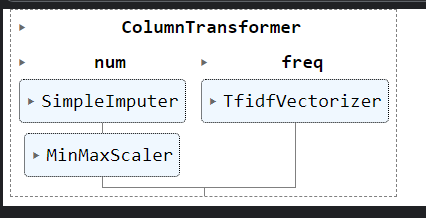

**train if the pipeline works fine**

In [ ]:
trial = preprocessing_pipe.fit_transform(dummy_X_train)


In [ ]:
trial

<h1 align="left"><font color='yellow'>Linear-Svc Model</font></h1>

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC


pipeline_svc = Pipeline([
    ('pipe_1', preprocessing_pipe ),  # Using the preprocessor  defined previously
    ('classifier', LinearSVC(dual = False))  # Linear Support Vector Classifier
])
pipeline_svc

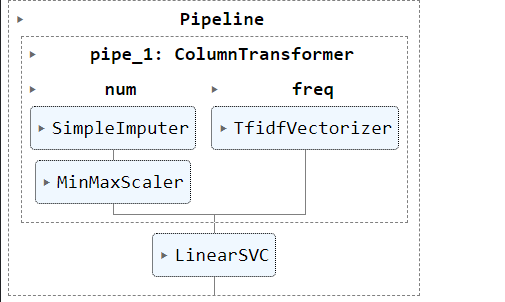

In [ ]:
pipeline_svc.fit(dummy_X_train, dummy_y_train_encoded)

**hyperparameter tuning for linear svc**

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV


# the hyperparameter grid
hyperparameter_lsvc = {
     'classifier__C': [0.1, 1, 10],
     'pipe_1__freq__frequency__ngram_range':[(1,2), (1,3)] # Regularization parameter
}

# GridSearchCV object
grid_search = GridSearchCV(pipeline_svc ,param_grid = hyperparameter_lsvc, cv=3, scoring='f1')

# To Fit the GridSearchCV on the training data
grid_search.fit(dummy_X_train, dummy_y_train_encoded)

# To Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# To Make predictions on the testing data using the best model
dummy_y_pred_svc = best_model.predict(dummy_X_test)

# To Evaluate the model's accuracy using f1_score
f1_score_svc = f1_score(dummy_y_test_encoded, dummy_y_pred_svc, average='micro')

print("Best Hyperparameters:", grid_search.best_params_)
print("F1 Score:", f1_score_svc)

<font color='pink'>**Best Hyperparameters: {'classifier__C': 1, 'pipe_1__freq__frequency__ngram_range': (1, 3)}
F1 Score: 0.8313467682477268**</font>

In [ ]:
n_model_test_svc = best_model.predict(test_movies_for_prediction) 
n_model_test_svc

**Submission file**

In [ ]:
submission = pd.DataFrame(columns = ['sentiment'])
submission ['sentiment'] = label_encoder.inverse_transform(n_model_test_svc)
submission.to_csv('submission.csv' , index_label = 'id' )

In [ ]:
submission.head()

<h1 align="left"><font color='yellow'>Logistic-regression Model</font></h1>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline_LR = Pipeline([
    ('pipe_1', preprocessing_pipe ),  # Using the preprocessor  defined previously
    ('classifier', LogisticRegression(max_iter=1000))  # Linear Support Vector Classifier
])
pipeline_LR

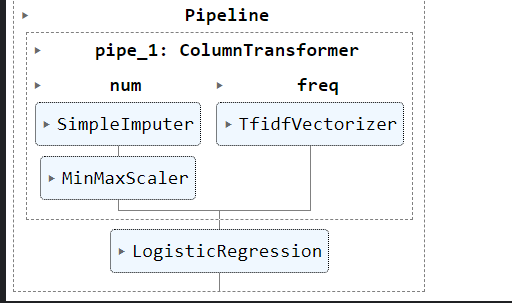

In [ ]:
pipeline_LR.fit(dummy_X_train, dummy_y_train_encoded)

**Hyperparameter tuning for logistic Regression**

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV


hyperparameter_LR = {
    'pipe_1__freq__frequency__ngram_range':[(1,2), (1,3)],
    'classifier__C' : [0.1,1,8, 10, 12],
    'classifier__solver': ['liblinear','saga']
}

# GridSearchCV object
grid_search = GridSearchCV(pipeline_LR ,param_grid = hyperparameter_LR, cv=3, scoring='f1')

# To Fit the GridSearchCV on the training data
grid_search.fit(dummy_X_train, dummy_y_train_encoded)

# To Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# To Make predictions on the testing data using the best model
dummy_y_pred_LR = best_model.predict(dummy_X_test)

# To Evaluate the model's accuracy using f1_score
f1_score_LR = f1_score(dummy_y_test_encoded, dummy_y_pred_LR, average='micro')

print("Best Hyperparameters:", grid_search.best_params_)
print("F1 Score:", f1_score_LR)

<font color='pink'>**Best Hyperparameters: {'classifier__C': 8, 'classifier__solver': 'saga', 'pipe_1__freq__frequency__ngram_range': (1, 2)}
F1 Score: 0.8769798896600818** </font>

In [ ]:
n_model_test_LR = best_model.predict(test_movies_for_prediction)
n_model_test_LR

**Submission file**

In [ ]:
submission = pd.DataFrame(columns = ['sentiment'])
submission ['sentiment'] = label_encoder.inverse_transform(n_model_test_LR)
submission.to_csv('submission.csv' , index_label = 'id' )

In [ ]:
submission

<h1 align="left"><font color='yellow'>SGD classifier</font></h1>

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
# from sklearn.metrics import f1_score
# from sklearn.model_selection import GridSearchCV

pipeline_SGD = Pipeline([
    ('pipe_1', preprocessing_pipe ),  # Using the preprocessor  defined previously
    ('classifier', SGDClassifier())  # Linear Support Vector Classifier
])
pipeline_SGD

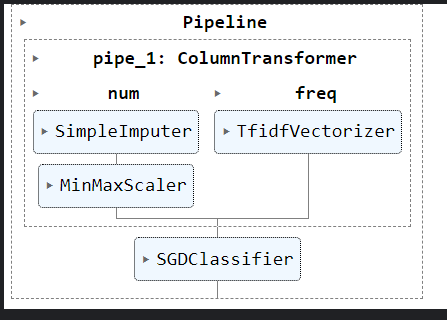

In [ ]:
pipeline_SGD.fit(dummy_X_train, dummy_y_train_encoded)

**Hyperparameter for SGD classifier**

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

hyperparameter_SGD = {
    'classifier__alpha': [0.0001, 0.001, 0.01],  # Regularization parameter
    'pipe_1__freq__frequency__min_df': [1, 2, 3],  # Minimum document frequency for feature extraction
    'classifier__penalty': ['l2', 'l1', 'elasticnet'],  # Regularization penalty type
}


# GridSearchCV object
grid_search = GridSearchCV(pipeline_SGD ,param_grid = hyperparameter_SGD, cv=3, scoring='f1')

# To Fit the GridSearchCV on the training data
grid_search.fit(dummy_X_train, dummy_y_train_encoded)

# To Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# To Make predictions on the testing data using the best model
dummy_y_pred_SGD = best_model.predict(dummy_X_test)

# To Evaluate the model's accuracy using f1_score
f1_score_SGD = f1_score(dummy_y_test_encoded, dummy_y_pred_SGD , average='micro')

print("Best Hyperparameters:", grid_search.best_params_)
print("F1 Score:", f1_score_SGD)

<font color='pink'>**Best Hyperparameters: {'classifier__alpha': 0.0001, 'classifier__penalty': 'l2', 'pipe_1__freq__frequency__min_df': 3}
F1 Score: 0.7835770459572377**</font>

In [ ]:
n_model_test_SGD = best_model.predict(test_movies_for_prediction)
n_model_test_SGD

**Submission file**

In [ ]:
submission = pd.DataFrame(columns = ['sentiment'])
submission ['sentiment'] = label_encoder.inverse_transform(n_model_test_SGD)
submission.to_csv('submission.csv' , index_label = 'id' )

In [ ]:
submission